## Final Project - The Effect of Neurodegenerative Disease on the Economy of Words

In [264]:
import string
import numpy as np
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt
import operator

Load text files and author birth year.

In [265]:
birthYear = 1882
txt1 = open("./testGroup/VWoolf/1915_TheVoyageOut.txt","r")
txt1_age = 1915 - birthYear
txt2 = open("./testGroup/VWoolf/1925_MrsDalloway.txt","r")
txt2_age = 1925 - birthYear
txt3 = open("./testGroup/VWoolf/1929_ARoomOfOnesOwn.txt","r")
txt3_age = 1929 - birthYear

Remove punctuations in text.

In [266]:
remove = dict.fromkeys(map(ord, string.punctuation))

Collapse tokens to lower case.

In [267]:
txt1 = txt1.read().translate(remove).lower()
txt2 = txt2.read().translate(remove).lower()
txt3 = txt3.read().translate(remove).lower()

Construct a dictionary where `key` = word, `value` = count (or frequency).

In [268]:
wordfreq1 = {}
for word in txt1.split():
    if word not in wordfreq1:
        wordfreq1[word] = 1
    else:
        wordfreq1[word] += 1
wordfreq2 = {}
for word in txt2.split():
    if word not in wordfreq2:
        wordfreq2[word] = 1
    else:
        wordfreq2[word] += 1
wordfreq3 = {}
for word in txt3.split():
    if word not in wordfreq3:
        wordfreq3[word] = 1
    else:
        wordfreq3[word] += 1

**Step 1**: Construct an array of sorted word frequency of all words, and a separate array of word lengths.

In [269]:
# text 1
sorted_dict1 = sorted(wordfreq1.items(), key=operator.itemgetter(1), reverse=True)
sorted_wordfreq1 = []
sorted_wordfreq_vals1 = []
word_lengths1 = []
for item in sorted_dict1: 
    sorted_wordfreq1.append(item[0])
    sorted_wordfreq_vals1.append(item[1])
    word_lengths1.append(len(item[0]))
# text 2
sorted_dict2 = sorted(wordfreq2.items(), key=operator.itemgetter(1), reverse=True)
sorted_wordfreq2 = []
sorted_wordfreq_vals2 = []
word_lengths2 = []
for item in sorted_dict2: 
    sorted_wordfreq2.append(item[0])
    sorted_wordfreq_vals2.append(item[1])
    word_lengths2.append(len(item[0]))
# text 3
sorted_dict3 = sorted(wordfreq3.items(), key=operator.itemgetter(1), reverse=True)
sorted_wordfreq3 = []
sorted_wordfreq_vals3 = []
word_lengths3 = []
for item in sorted_dict3: 
    sorted_wordfreq3.append(item[0])
    sorted_wordfreq_vals3.append(item[1])
    word_lengths3.append(len(item[0]))

**Step 2**: Construct an array of ranks from on the sorted frequency array in **Step 1**.

In [270]:
ranks1 = []
k1 = 1
for word in sorted_wordfreq1:
    ranks1.append(k1)
    k1 += 1
ranks2 = []
k2 = 1
for word in sorted_wordfreq2:
    ranks2.append(k2)
    k2 += 1
ranks3 = []
k3 = 1
for word in sorted_wordfreq3:
    ranks3.append(k3)
    k3 += 1

**Step 3** (optional): Print the most frequent 20 words and their frequencies.

In [271]:
print("20 most common words:")

print("Text 1")
for i in range(20):
    print(sorted_dict1[i])
print("Text 2")
for i in range(20):
    print(sorted_dict2[i])
print("Text 3")
for i in range(20):
    print(sorted_dict3[i])

20 most common words:
Text 1
('the', 7367)
('and', 4508)
('of', 3842)
('to', 3703)
('a', 3009)
('she', 2491)
('in', 2302)
('was', 2091)
('her', 1965)
('he', 1659)
('that', 1571)
('it', 1397)
('i', 1259)
('had', 1214)
('they', 1199)
('with', 1142)
('as', 1074)
('you', 1023)
('at', 978)
('for', 956)
Text 2
('the', 3215)
('and', 1829)
('of', 1554)
('to', 1497)
('she', 1482)
('a', 1373)
('was', 1249)
('her', 1239)
('in', 1163)
('he', 1128)
('it', 891)
('had', 887)
('that', 675)
('with', 581)
('for', 531)
('—', 527)
('his', 488)
('but', 481)
('on', 447)
('at', 440)
Text 3
('the', 2172)
('of', 1482)
('and', 1375)
('a', 1015)
('to', 1015)
('in', 664)
('that', 642)
('it', 557)
('i', 553)
('was', 439)
('is', 435)
('for', 316)
('one', 290)
('her', 273)
('have', 272)
('not', 266)
('or', 260)
('she', 251)
('had', 241)
('as', 240)


**Step 4**: Print a scatter plot of $log(freq)$ against $log(rank)$ for all three texts. 

**Step 5**: Print slopes derived from linear regression on the above scatter plots. 

SLOPE 1
-1.2050583063462836
SLOPE 2
-1.0082923716212628
SLOPE 3
-0.9242210824111095


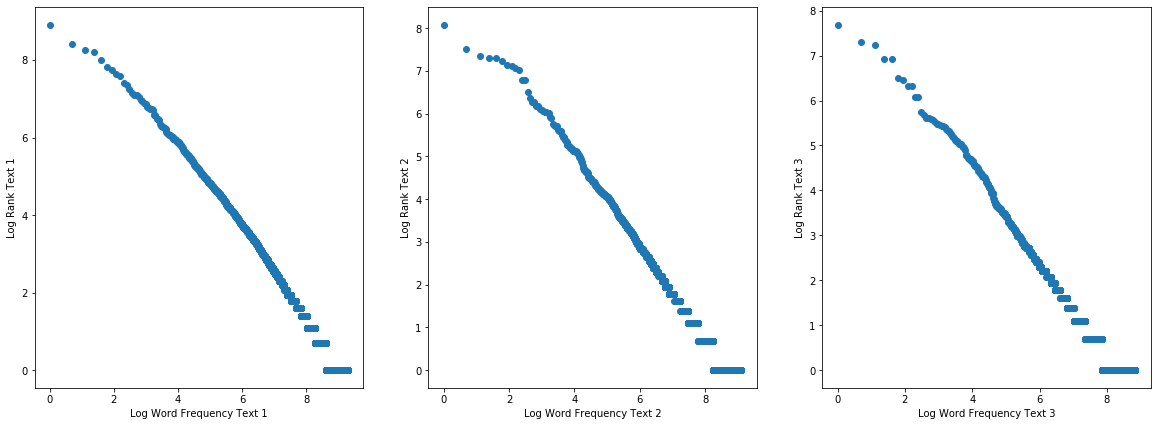

In [272]:
plt.figure(figsize=(20,7))

# Text 1
plt.subplot(131)
plt.scatter(np.log(np.array(ranks1)), np.log(np.array(sorted_wordfreq_vals1)))
plt.xlabel('Log Word Frequency Text 1')
plt.ylabel('Log Rank Text 1')

linefit1 = np.polyfit(np.log(np.array(ranks1)),np.log(np.array(sorted_wordfreq_vals1)),1) 
slope1 = linefit1[0]
print("SLOPE 1")
print(slope1)

# Text 2
plt.subplot(132)
plt.scatter(np.log(np.array(ranks2)), np.log(np.array(sorted_wordfreq_vals2)))
plt.xlabel('Log Word Frequency Text 2')
plt.ylabel('Log Rank Text 2')

linefit2 = np.polyfit(np.log(np.array(ranks2)),np.log(np.array(sorted_wordfreq_vals2)),1) 
slope2 = linefit2[0]
print("SLOPE 2")
print(slope2)

# Text 3
plt.subplot(133)
plt.scatter(np.log(np.array(ranks3)), np.log(np.array(sorted_wordfreq_vals3)))
plt.xlabel('Log Word Frequency Text 3')
plt.ylabel('Log Rank Text 3')

linefit3 = np.polyfit(np.log(np.array(ranks3)),np.log(np.array(sorted_wordfreq_vals3)),1) 
slope3 = linefit3[0]
print("SLOPE 3")
print(slope3)

plt.show()

**Step 6**: Plot slopes from scatter plots above vs author's age at time of writing.

Slope
0.01998610781789507


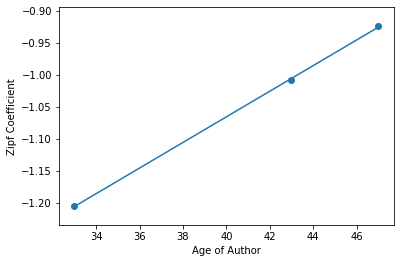

In [273]:
plt.scatter([txt1_age, txt2_age, txt3_age], [slope1, slope2, slope3])

linefit = np.polyfit([txt1_age, txt2_age, txt3_age],[slope1, slope2, slope3],1)
slope = linefit[0]
intercept = linefit[1]

x = np.array([txt1_age, txt2_age, txt3_age])
y = x*slope + intercept
plt.plot(x, y)
plt.xlabel("Age of Author")
plt.ylabel('Zipf Coefficient')
print("Slope")
print(slope)

**Step 7**: Pronoun frequency. Find total number of pronouns in book over total words and graph against age with slope.

Slope
0.00013464280786387798


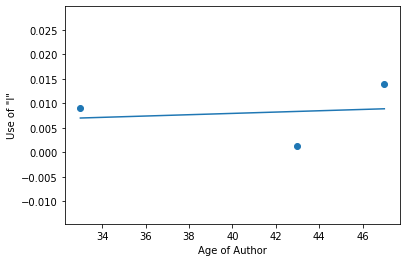

In [274]:
pronouns = ['i']

totalPronouns1 = 0
totalPronouns2 = 0
totalPronouns3 = 0
for word in pronouns: 
    totalPronouns1 += wordfreq1[word]
    totalPronouns2 += wordfreq2[word]
    totalPronouns3 += wordfreq3[word]

plt.scatter([txt1_age, txt2_age, txt3_age], [totalPronouns1/len(txt1.split()), totalPronouns2/len(txt2.split()), totalPronouns3/len(txt3.split())])

linefit = np.polyfit([txt1_age, txt2_age, txt3_age],[totalPronouns1/len(txt1.split()), totalPronouns2/len(txt2.split()), totalPronouns3/len(txt3.split())],1)
slope = linefit[0]
intercept = linefit[1]

x = np.array([txt1_age, txt2_age, txt3_age])
y = x*slope + intercept
plt.xlabel("Age of Author")
plt.ylabel('Use of "I"')
plt.plot(x, y)
print("Slope")
print(slope)